In [1]:
#imports
from code_file.imports_and_libraries import *
from code_file.dataset_creation import *
from code_file.positional_encodings import *
from code_file.models import *
from code_file.train_and_test import *
from code_file.visualizations import *

import inspect

Configuration

In [2]:
import code_file.configuration as cfg
print(inspect.getsource(cfg))

from pathlib import Path
import numpy as np


SEED = 177013               #seed for reproducibility
NUM_OF_SAMPLES = 1000       #number of samples in dataset
TIME_INTERVAL = [0.0, 2*np.pi]      #interval for time
DISCR_OF_TIME = 100         #level of time discretization
OMEGA_MIN = 0.5             #minimal value for frequency (omega)
OMEGA_MAX = 10              #maximal value for frequency (omega)
AMPLITUDE_MIN = 1           #minimal value for amplitude (A)
AMPLITUDE_MAX = 1           #maximal value for amplitude (A)

EPOCHS = 200 


PLOTS_DIR = Path("plots/rep02-diff-w-and-discretization")
PLOTS_DIR.mkdir(parents=True, exist_ok=True)





- Seed is constant for reproducibility for everything (for dataset, for torch...)
- setup model, criterion, optimizer and scheduler

In [3]:
#setup for reproducibility and device
set_seed()
device = set_device()

#setup for model and more
model = TransformerModel1(seq_len=DISCR_OF_TIME, d_model=128, nhead=4, num_layers=2, dim_f=256, dropout=0.1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

Seed: 177013
cuda


- Creating dataset, from np.arrays dataset to tensor dataset
- splitting data into training, validation and test parts

In [4]:
#creating dataset and converting to tensor dataset
V_np, tar_np, t_np = make_sine_dataset()
ds_full = from_array_to_tensor_dataset(V_np, tar_np)

#splitting to train, val and test parts
train_loader, val_loader, test_loader = split_and_load(ds_full)

- Training and evaluation step
- Test step

In [5]:
#training and validation steps
model, train_mse_hist, val_mse_hist = train_and_eval_training(train_loader, val_loader, device, model, criterion, optimizer, scheduler)

#test step
test_mse, test_mae = evaluate(test_loader, model, device)
print(f"Test MSE {test_mse:.6f}, MAE {test_mae:.6f}")

Epoch  20; Train MSE 0.062226, MAE 0.215257; Val MSE 0.059500, MAE 0.209575
Epoch  40; Train MSE 0.009101, MAE 0.081691; Val MSE 0.011659, MAE 0.092319
Epoch  60; Train MSE 0.003235, MAE 0.045406; Val MSE 0.004292, MAE 0.053029
Epoch  80; Train MSE 0.007407, MAE 0.074571; Val MSE 0.008521, MAE 0.079242
Epoch 100; Train MSE 0.005721, MAE 0.060934; Val MSE 0.006919, MAE 0.069093
Epoch 120; Train MSE 0.002624, MAE 0.043651; Val MSE 0.003079, MAE 0.046490
Epoch 140; Train MSE 0.001523, MAE 0.032414; Val MSE 0.002058, MAE 0.036598
Epoch 160; Train MSE 0.001117, MAE 0.026540; Val MSE 0.001649, MAE 0.031644
Epoch 180; Train MSE 0.000920, MAE 0.022955; Val MSE 0.001635, MAE 0.031915
Epoch 200; Train MSE 0.000909, MAE 0.022777; Val MSE 0.001565, MAE 0.030845
Test MSE 0.001163, MAE 0.025726


- Plot for predicted w versus real w
- Plot for loss function across train and validation parts

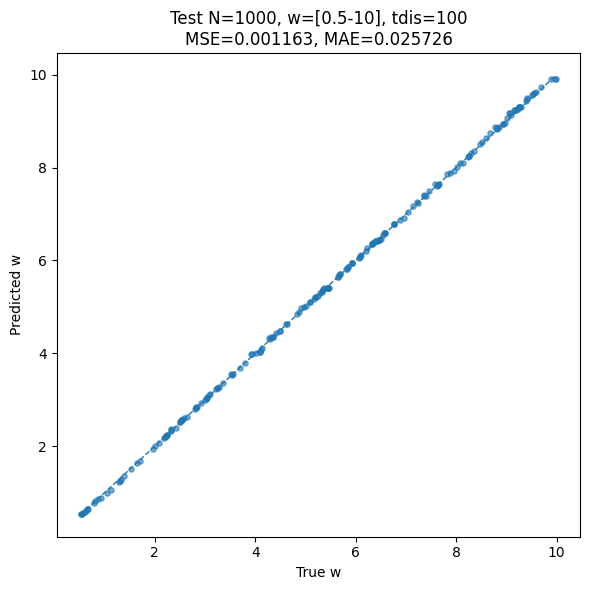

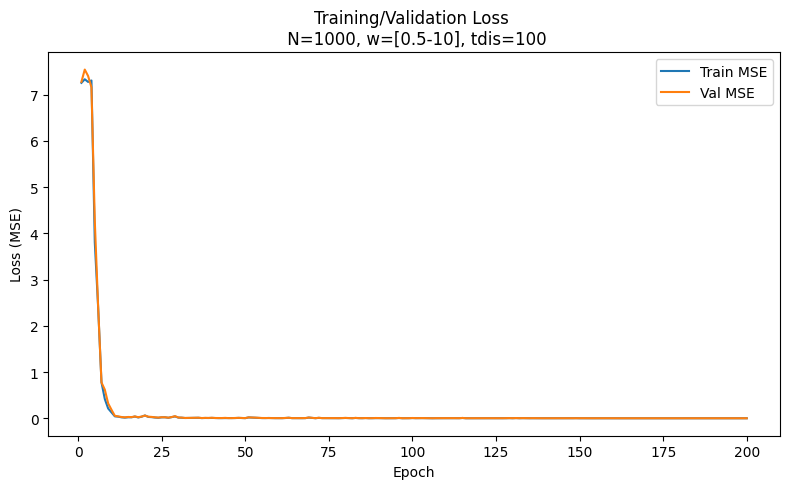

In [6]:
#plotting data collection
y_true, y_pred = prediction_collecter_plot(test_loader, model, device)

#plots - without saving, only showing
plot_pred_vs_true(y_true, y_pred, test_mse, test_mae, show_plot=True)
plot_loss_curves(train_mse_hist, val_mse_hist, show_plot=True)